In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from iminuit import Minuit
from scipy.optimize import basinhopping
from scipy.optimize import curve_fit

In [2]:
def twi_minus_loglikelihood(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata00 = pd.read_csv("perlist00.csv")
    f = perdata00['f']
    per = perdata00['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata00)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D

In [3]:
bnds=(0.001,0.1),(1.0E-4,1.0E-3),(2.0,5.0),(0,1)
minimizer_kwargs = {"bounds":(bnds)}
x0=[0.005,1.7E-4,3.8,0.8]
x0_array=np.array(x0)
m = minimize(twi_minus_loglikelihood,x0_array,method = 'L-BFGS-B',bounds=bnds)


# m = basinhopping(twi_minus_loglikelihood,x0_array,minimizer_kwargs=minimizer_kwargs)

326.25985765080605
326.25982869095895
326.257704376485
326.2598577551031
326.2598608356317
1146.135619161248
1146.1356721466707
1146.1395516946818
1146.1356134717894
1146.1356209285425
332.4013416734433
332.40136783989976
332.4043758293212
332.4013413166346
332.401344891274
310.15763019440584
310.15764800083156
310.15904516297087
310.1576300943769
310.15763352725367
303.5192540967211
303.5192667754175
303.5205583129459
303.51925401331084
303.519257389821
290.84686911516985
290.84686525149914
290.84424297959356
290.8468692873565
290.84687211373677
277.0178421343353
277.01784203509436
277.01683225338206
277.0178422283426
277.0178450562642
656.8257500488044
656.8257238768946
656.7981765221601
656.8257652357622
656.8257181813622
266.48117881914334
266.4811809469346
266.48152694933674
266.48117883743595
266.4811816050754
246.73506820364875
246.73507467659988
246.73994724511414
246.73506785781206
246.7350692493596
246.291986916712
246.29199297295168
246.29626573598188
246.2919866348085
246.2

In [4]:
print(m)

# L-BFGS-B  225.98095149945118
# TNC       226.70617814898617
# SLSQP     263.784255352502

      fun: 225.98095149945118
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.44647663,  0.11543193,  0.81333553, -1.77725497])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 230
      nit: 36
   status: 0
  success: True
        x: array([4.69067416e-03, 2.42109900e-04, 2.95474504e+00, 4.13131415e-01])


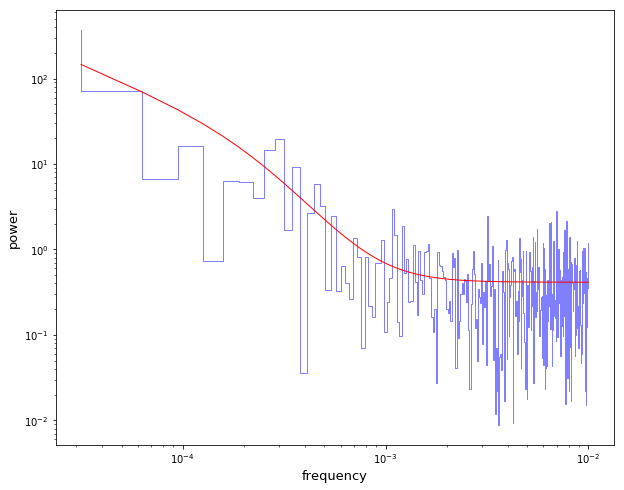

In [5]:
perdata00 = pd.read_csv("perlist00.csv")
f = perdata00['f']
per = perdata00['per']

alpha_L = 1.0
parameter = m.x
A,f_b,alpha_H,poisson = parameter

model = []
f_length = len(f)
for i in range(f_length):
    model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
    
plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f, per, color="b", alpha=0.5, linewidth=1)
plt.plot(f, model, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=13)
plt.ylabel("power",fontsize=13)
plt.show()

In [ ]:
def twi_minus_loglikelihood_nobreak(parameter):
    A,f_b,alpha_H,poisson = parameter
    alpha_L = 1.0
    
    perdata00 = pd.read_csv("perlist00.csv")
    f = perdata00['f']
    per = perdata00['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/f_b)**(alpha_H-alpha_L)))*A+poisson)
     
    
    length = len(perdata00)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    print (D)
    return D